In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [11]:
X_train[2].shape

(28, 28)

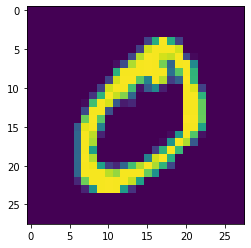

In [14]:
plt.imshow(X_train[1])

In [16]:
y_train[1]  #y_train is class label saying this digit is 0

0

In [17]:
#scaling the dataset
X_train = X_train / 255
X_test = X_test / 255

In [31]:
#After scaling convert the 2-d matrix to a 1-d array
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [36]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=25, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),    #conv layer. It will figure out the filters on its own. we dont have to tell explicitly.
                                                                                            #we need to tell filter size and how many filter to use
    layers.MaxPooling2D((2,2)),  #max pooling layer 
#     layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),    
#     layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=25, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(filters=25, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),    
])

In [38]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [40]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3099 - accuracy: 0.9039
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1146 - accuracy: 0.9644
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0858 - accuracy: 0.9730
Epoch 4/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0703 - accuracy: 0.9785
Epoch 5/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0594 - accuracy: 0.9813
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0510 - accuracy: 0.9840
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0447 - accuracy: 0.9856
Epoch 8/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 9/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0359 - accuracy: 0.9884
Epoch 10/20
1875/1875 [==============================] - 21s 11m

In [41]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0612 - accuracy: 0.9860


[0.06117609888315201, 0.9860000014305115]

In [42]:
y_predicted_by_model = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [43]:
y_pred_classes=[np.argmax(e) for e in y_predicted_by_model]

In [44]:
y_pred_classes[0]

7

In [45]:
y_test[0]

7

In [46]:
np.sum(y_predicted_by_model[0]) #sum of all preds given by softmax is always = 1

0.99999994